### Instantiate a random graph and transform into an adjacency matrix

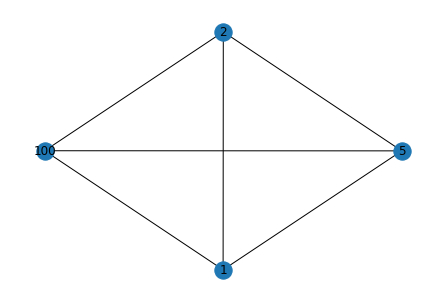

In [72]:
natfreqs_given = [1,2,5,100]
labeldict = {i:e for i, e in enumerate(natfreqs_given)}

graph_nx = nx.erdos_renyi_graph(n=len(natfreqs_given), p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)
nx.draw(graph_nx, labels=labeldict, with_labels = True)

### Instantiate model with parameters

In [73]:
#model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))
model = Kuramoto(coupling=3, dt=0.01, T=10, natfreqs=natfreqs_given)                                  

### Run simulation - output is time series for all nodes (node vs time)

In [74]:
act_mat = model.run(adj_mat=graph)
print(act_mat.shape)

(4, 1000)


### Plot all the time series

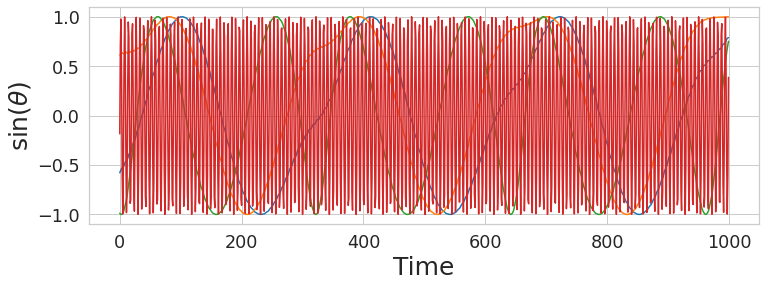

In [75]:
plot_activity(act_mat);

### Plot evolution of order global order parameter $R_t$

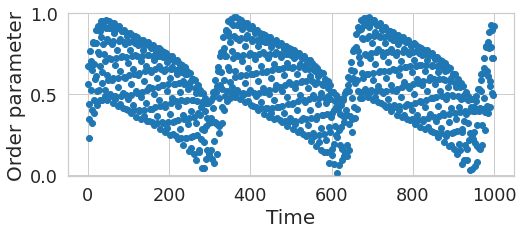

In [76]:
plot_phase_coherence(act_mat);

### Plot oscillators in complex plane at different times

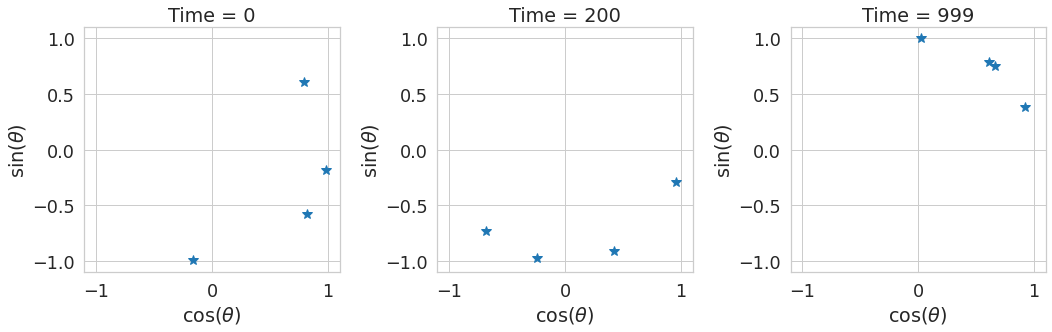

In [77]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })



times = [0, 200, 999]
        
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            '*', 
            markersize=10)
    ax.set_title(f'Time = {time}')
        


plt.tight_layout()

In [78]:
labeldict

{0: 1, 1: 2, 2: 5, 3: 100}

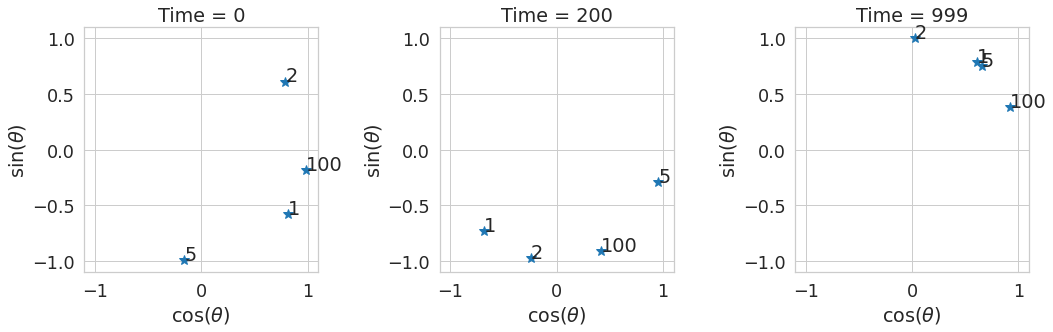

In [79]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })



times = [0, 200, 999]
        
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            '*', 
            markersize=10)
    ax.set_title(f'Time = {time}')
    for key, value in labeldict.items():
        ax.annotate(value, 
                    (
                        np.cos(act_mat[:, time])[key],
                        np.sin(act_mat[:, time])[key]
                     )
                    )
        


plt.tight_layout()